# CUSTOMER CLUSTERING TASK

### CONTENT - ABOUT DATASET

**1. ID	numerical	Integer	Shows a unique identificator of a customer.**

**2. Sex	categorical	{0,1}	Biological sex (gender) of a customer. 0 = male / 1 = female**

**3. Marital status	categorical	{0,1}	Marital status of a customer. 0 = single / 1 = non-single**

**4. Age	numerical	Integer	The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset (Min. age = 18 / Max. age = 78)**

**5. Education	categorical	{0,1,2,3}	Level of education of the customer. 0=no education / 1=high-school / 2=university / 3=graduate**

**6. Income	numerical	Real	Self-reported annual income in US dollars of the customer.**

**7. Occupation	categorical	{0,1,2}	Category of occupation of the customer. 0=unemployed / 1=employee/oficial / 2=management or self-employed**

**8. Settlement size	categorical	{0,1,2}	The size of the city that the customer lives in. 0=small / 1=mid-size / 2=big**


In [9]:
!pip install numpy pandas-profiling matplotlib seaborn --quiet

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [7]:
customer_df = pd.read_csv('segmentation data.csv')

In [8]:
customer_df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [10]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [11]:
customer_df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


<AxesSubplot:xlabel='Sex', ylabel='count'>

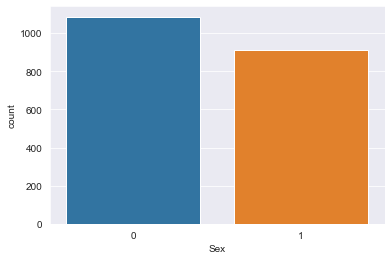

In [19]:
sns.countplot(x = 'Sex', data = customer_df)

Customer's sex are quite balanced

<AxesSubplot:xlabel='Marital status', ylabel='count'>

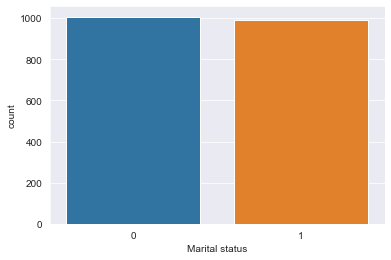

In [45]:
sns.countplot(x = 'Marital status', data = customer_df)

The Marital status of the customers are balanced

<AxesSubplot:xlabel='Age', ylabel='Count'>

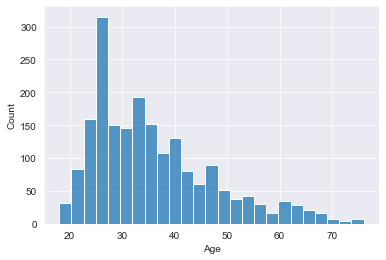

In [16]:
sns.histplot(x = 'Age', data = customer_df)

<AxesSubplot:xlabel='Education', ylabel='count'>

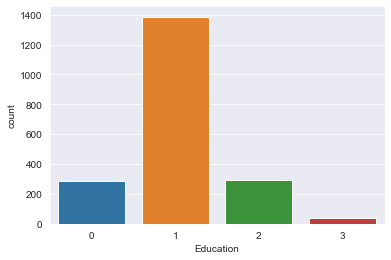

In [57]:
sns.countplot(x = 'Education', data = customer_df)

Most customers have highschool level education. 

<AxesSubplot:xlabel='Income', ylabel='Count'>

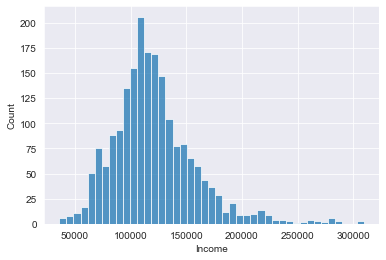

In [56]:
sns.histplot(x = 'Income', data = customer_df)

The feature 'Income' has the same right skew problem as the 'Age' feature.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

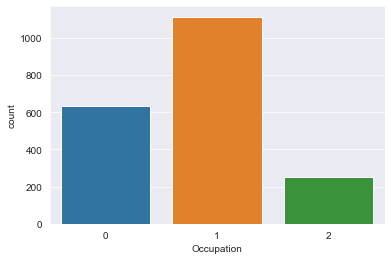

In [22]:
sns.countplot(x = 'Occupation', data = customer_df)

<AxesSubplot:xlabel='Settlement size', ylabel='count'>

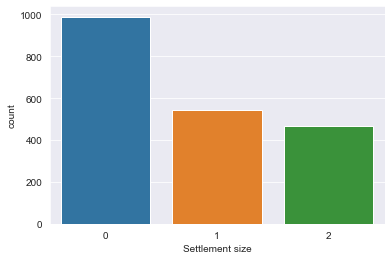

In [24]:
sns.countplot(x = 'Settlement size', data = customer_df)

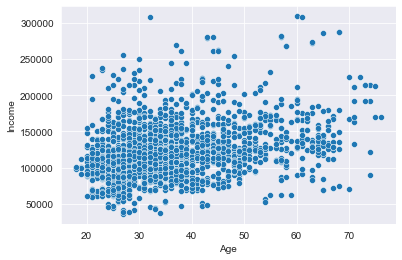

In [25]:
sns.scatterplot(data=customer_df, x='Age', y='Income');

There is some small correlation between the Age and Income features. We notice that the slope of the line is very small, which shows that the correlation between the features is low.

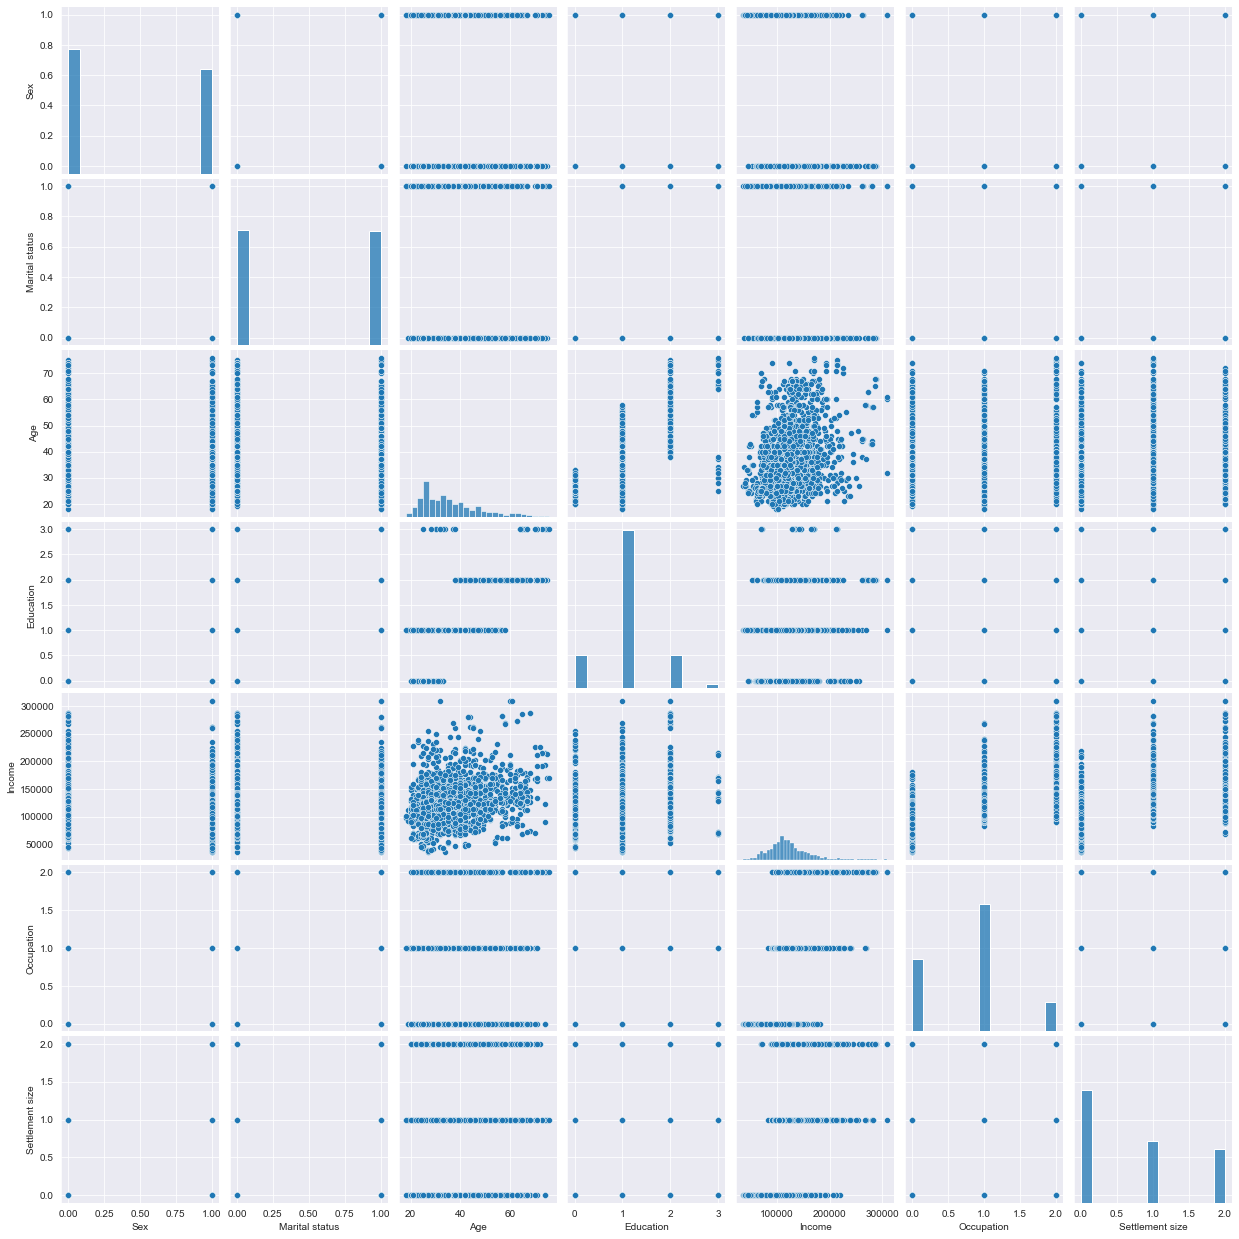

In [36]:
sns.pairplot(customer_df.iloc[:,1:8])

In [37]:
numerical_col = ['Age', 'Income'] 

In [41]:
X = customer_df[numerical_col]
X.head()

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031


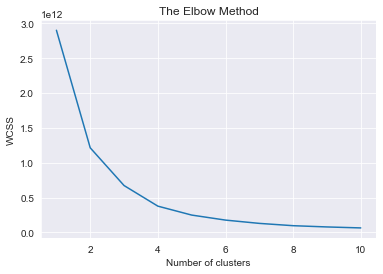

In [43]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 

    wcss.append(kmeans.inertia_) 
    
plt.plot(range(1, 11), wcss) 
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The Sum of squared distances started to stabilize from the 4th cluster. Therefore, the best number of clusters (k) in this task is 4

In [59]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [60]:
X['Centroids'] = y_kmeans
X

C:\Users\udehs\AppData\Local\Temp/ipykernel_18476/513276716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Centroids'] = y_kmeans


,Age,Income,Centroids
0,67,124670,0
1,22,150773,3
2,49,89210,2
3,45,171565,3
4,53,149031,3
...,...,...,...
1995,47,123525,0
1996,27,117744,0
1997,31,86400,2
1998,24,97968,0


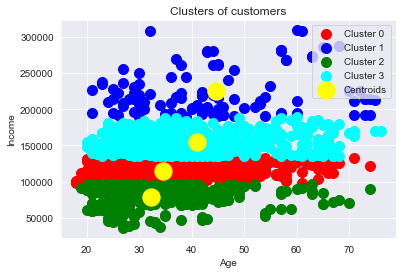

In [61]:
x = X.values
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend() 
plt.show()

In [62]:
print(x[0:10, :]) 
print ("Data type of x= ", type(x), 'with shape', x.shape)
print ("Data type of X DataFrame= ", type(X), 'with shape', X.shape)

[[    67 124670      0]
 [    22 150773      3]
 [    49  89210      2]
 [    45 171565      3]
 [    53 149031      3]
 [    35 144848      3]
 [    53 156495      3]
 [    35 193621      1]
 [    61 151591      3]
 [    28 174646      3]]
Data type of x=  <class 'numpy.ndarray'> with shape (2000, 3)
Data type of X DataFrame=  <class 'pandas.core.frame.DataFrame'> with shape (2000, 3)


X and x has 2000 rows : The total number of customers under consideration
3 columns: The features under consideration i.e Age, Income and the predicted(Centroids)

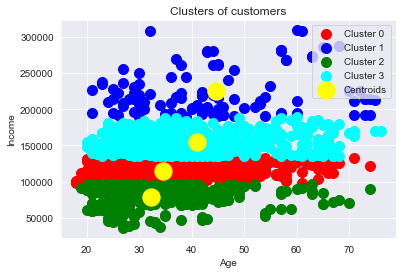

In [63]:
#for datapoints in cluster 0
Income_Cluster_0 = X[X.Centroids == 0]['Age'] 
Spending_Score_Cluster_0 = X[X.Centroids == 0]['Income']
plt.scatter(Income_Cluster_0, Spending_Score_Cluster_0, s = 100, c = 'red', label = 'Cluster 0')

#for datapoints in cluster 1
Income_Cluster_1 = X[X.Centroids == 1]['Age'] 
Spending_Score_Cluster_1 = X[X.Centroids == 1]['Income']
plt.scatter(Income_Cluster_1, Spending_Score_Cluster_1, s = 100, c = 'blue', label = 'Cluster 1')

#for datapoints in cluster 2
Income_Cluster_2 = X[X.Centroids == 2]['Age'] 
Spending_Score_Cluster_2 = X[X.Centroids == 2]['Income']
plt.scatter(Income_Cluster_2, Spending_Score_Cluster_2, s = 100, c = 'green', label = 'Cluster 2')

#for datapoints in cluster 3
Income_Cluster_3 = X[X.Centroids == 3]['Age'] 
Spending_Score_Cluster_3 = X[X.Centroids == 3]['Income']
plt.scatter(Income_Cluster_3, Spending_Score_Cluster_3, s = 100, c = 'cyan', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')

plt.xlabel('Age')

plt.ylabel('Income')

plt.legend()

plt.show()